# Chapter 1: 通过代码学数学

**NOTE:** 大部分代码在这里不会被解释，她们绘制了第一章的图形，这只是让你浏览一下，请运行一下并看看效果，如果感兴趣的话。

如果你以后再来看看这些，一定会觉得小菜一碟。

## 1.1 使用数学和软件来解决商业问题 (Solving lucrative problems with math and software)

### 1.1.1 预测金融市场走势 (Predicting financial market movements)

In [2]:
import matplotlib.pyplot as plt # 绘图
import numpy as np # 矩阵
from scipy import stats # scipy是一个科学计算库。 这里导入其中的stats， 她是一个统计学(Statistics)模块
from math import sqrt, log

plt.rcParams['font.family'] = ['SimHei'] # 中文显示

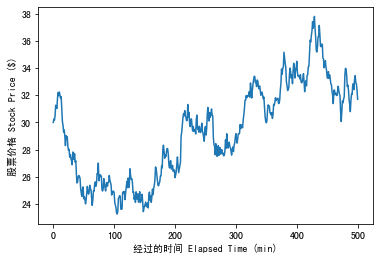

In [3]:
xs = range(0,501) # 500分钟
ys = [30] # 0分钟时的初始y值（y代表股票价格）

# 随机数播种机设定seed=42，不同的seed产生的随机数列不同，
# 你多运行几次会发现相同的seed产生的一样的随机数列，输出的图表相同。
np.random.seed(seed=42) 

for delta in np.random.normal(0,0.5,500):
    # delta是从上一个y到下一个y的波动
    ys.append(ys[-1] + delta)
    
plt.plot(ys)
plt.ylabel('股票价格 Stock Price ($)')
plt.xlabel('经过的时间 Elapsed Time (min)')
plt.savefig('figures/1.01.svg') # svg是一种比png等像素图像更清晰的图像, 可以在浏览器中打开

# 注：这里存储fig使用的路径是相对路径，
# figures/1.01.svg表示在当前notebook文件的所在的文件夹Chapter 02中的figures文件夹中的1.01.svg
# 如果你不懂请询问我。

In [4]:
r = stats.linregress(xs, ys)  # 计算两组测量值xs, ys的线性最小二乘回归。
""" linregress 返回的r 有几个属性：
slope (float)
    Slope of the regression line. 线性回归曲线的斜率Slope
intercept (float)
    Intercept of the regression line. 线性回归曲线的纵截距intercept
......
"""
line = [r.slope * x + r.intercept for x in xs]  # 获得线性回归曲线的各点纵坐标


In [5]:
std = np.std([(y-y0) for y,y0 in zip(ys,line)]) # 计算标准差

In [6]:
top = [y + std for y in line]  # 回归曲线纵坐标上移标准差std
bottom = [y - std for y in line]  # 下移std


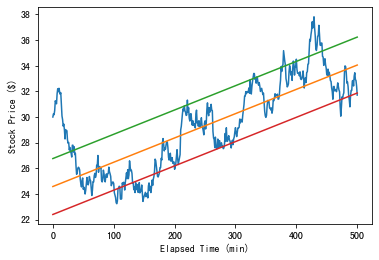

In [7]:
plt.plot(xs, ys)  # 原数据
plt.plot(xs, line)  # 线性回归曲线
plt.plot(xs, top)  # 上浮动
plt.plot(xs, bottom)  # 下浮动

plt.ylabel('Stock Price ($)')
plt.xlabel('Elapsed Time (min)')
plt.savefig('figures/1.02.svg')
plt.savefig('figures/1.03.svg')


### 1.1.2 Finding a good deal

In [16]:
# 英里里程
mileages = [4.1429, 8.9173, 6.5, 6.0601, 12.3, 6.2, 2.5782, 0.9, 1.7, 13.1045, 24.7, 9.2699, 17.2, 10.0, 10.0, 2.8, 12.3773, 19.6, 7.3397, 2.1178, 12.9886, 10.9884, 16.9, 6.0, 12.9, 8.1936, 10.5, 8.0713, 1.7, 10.0, 15.6097, 17.0, 16.7, 5.6, 11.3, 19.9, 9.6, 21.6, 20.3]
# 对应二手车价格
prices = [16980.0, 15973.0, 9900.0, 15998.0, 3900.0, 12540.0, 21688.0, 17086.0, 23000.0, 8900.0, 3875.0, 10500.0, 3500.0, 26992.0, 17249.0, 19627.0, 9450.0, 3000.0, 14999.0, 24990.0, 7967.0, 7257.0, 4799.0, 13982.0, 5299.0, 14310.0, 7800.0, 12250.0, 23000.0, 14686.0, 7495.0, 4950.0, 3500.0, 11999.0, 9600.0, 1999.0, 4300.0, 3500.0, 4200.0]

In [17]:
# 指数拟合曲线，这里居然直接写出来，没给出算法
def price(mileage): 
    return 26500 * (0.905 ** mileage)

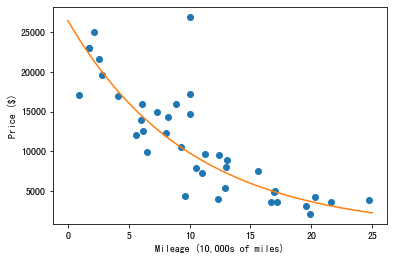

In [34]:
xs = np.linspace(0,25,100)
ys = price(xs) # xs对应的拟合曲线纵坐标

plt.scatter(mileages,prices)  # 原数据散点图
plt.plot(xs,ys, color='C1')  # 拟合曲线折线图
plt.xlabel('Mileage (10,000s of miles)')
plt.ylabel('Price ($)')
plt.savefig('figures/1.05.svg')

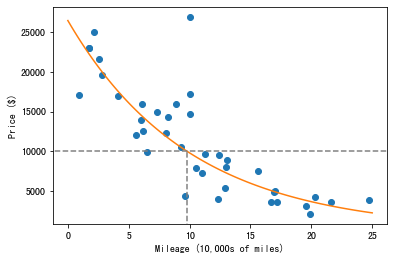

In [33]:
xs = np.linspace(0, 25, 100)
ys = price(xs)

# 这是在计算预算10000美元下的里程数是多少，看到书P5中间
target_mileage = log(10/26.5)/log(0.905)

plt.scatter(mileages, prices)
plt.plot(xs, ys, color='C1')

# 记录下原来的坐标系x范围和y范围，避免绘制辅助线时导致范围扩大，
# 不信你把这一行和后面的 plt.xlim(*xlim) plt.ylim(*ylim) 都注释掉看看
xlim, ylim = plt.xlim(), plt.ylim()

# 绘制连接(-5, 10000)和(30, 10000)的虚(dashed)折线, 辅助线使用了灰色gray保持低调
plt.plot([-5, 30], [10000, 10000], color="gray", linestyle="dashed")
# 绘制纵向的辅助折线，从(target_mileage, -5000)到(target_mileage, 10000)
plt.plot([target_mileage, target_mileage], [-5000, 10000], color="gray", linestyle="dashed")

# 保持原坐标系大小
plt.xlim(*xlim)
plt.ylim(*ylim)
# x, y轴要标注好， 最后保存起来
plt.xlabel('Mileage (10,000s of miles)')
plt.ylabel('Price ($)')
plt.savefig('figures/1.06.svg')


In [13]:
# 书P6开头计算行驶10000英里的二手车价格是原车的多少
0.905 ** 5

0.6070757653156251

### 1.1.3 Building 3D graphics and animations

In [14]:
import sys # sys模块提供了系统相关的参数和函数
sys.path.append('../Chapter 03') # 这里在处理python环境的sys.path中添加了../Chapter 03 （../ 代表该文件夹的父文件夹 Math-for-Programmers-zh/ ，Chapter 03 在 Math-for-Programmers-zh/ 中）

from draw3d import * # 由于../Chapter 03已经在环境变量中，从 ../Chapter 03/drwa3d中导入所有的函数和变量

sys.path # 我来查看环境变量， 最后一个是我们已经添加进来的了../Chapter 03

['/Users/pro/Desktop/TECH/Math/learnMathWithCode/Math-for-Programmers-zh/Chapter 01',
 '/Users/pro/.vscode/extensions/ms-toolsai.jupyter-2021.11.1001550889/pythonFiles',
 '/Users/pro/.vscode/extensions/ms-toolsai.jupyter-2021.11.1001550889/pythonFiles/lib/python',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python38.zip',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/lib-dynload',
 '',
 '/Users/pro/Library/Python/3.8/lib/python/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages',
 '/Users/pro/Desktop/TECH/人工智能/practice/work/Parakeet',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/extensions',
 '/Users/pro/.ipython',
 '../Chapter 03']

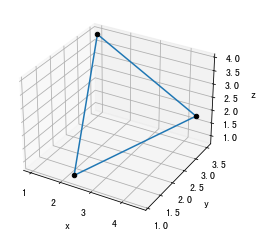

In [15]:
triangle = [(2.3,1.1,0.9), (4.5,3.3,2.0), (1.0,3.5,3.9)]

# 绘制triangle的三个点的连线，具体以后会知道的😁
draw3d(
    Polygon3D(*triangle),
    Points3D(*triangle),
    axes=False,
    origin=False,
    save_as='figures/1.08.svg'
)